In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.deterministic import DeterministicProcess
from sklearn.linear_model import LinearRegression

In [30]:
df = pd.read_csv(
    "/content/weatherAUS.csv",
  #  index_col='Date',
    parse_dates=['Date'])

df =df.set_index("Date").to_period('D')

In [31]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [32]:
Sale = df[df['Location'] == 'Sale']
Sale.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,Sale,10.7,22.1,0.0,10.0,11.5,WSW,76.0,W,WSW,...,46.0,62.0,1001.7,1003.4,4.0,6.0,18.4,16.7,No,No
2009-01-02,Sale,8.0,18.9,0.0,NaN,11.7,W,50.0,W,WSW,...,61.0,36.0,1016.2,1017.3,3.0,6.0,12.5,16.7,No,No
2009-01-03,Sale,4.2,20.0,0.0,4.0,9.1,ESE,33.0,WNW,ESE,...,63.0,43.0,1020.9,1018.0,1.0,6.0,12.9,18.8,No,No
2009-01-04,Sale,6.7,24.3,0.0,5.0,10.5,ESE,33.0,SSW,E,...,70.0,47.0,1017.0,1013.4,3.0,5.0,16.4,23.2,No,No
2009-01-05,Sale,8.9,27.9,0.0,6.8,10.8,ENE,37.0,WNW,SE,...,79.0,52.0,1011.4,1008.9,6.0,1.0,15.9,25.5,No,No


In [33]:
Sale.tail()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-21,Sale,1.8,14.1,0.0,NaN,NaN,NaN,NaN,W,NW,...,87.0,76.0,1028.3,1027.8,8.0,NaN,11.3,12.7,No,No
2017-06-22,Sale,8.2,13.9,0.0,NaN,NaN,NaN,NaN,W,SW,...,90.0,54.0,1028.4,1024.9,NaN,7.0,9.0,13.5,No,No
2017-06-23,Sale,2.0,16.3,0.0,NaN,NaN,NaN,NaN,WSW,NW,...,94.0,44.0,1018.5,1012.2,NaN,3.0,6.0,15.4,No,Yes
2017-06-24,Sale,6.0,12.8,1.4,NaN,NaN,NaN,NaN,WSW,W,...,92.0,59.0,1017.9,1016.4,NaN,1.0,7.9,11.5,Yes,No
2017-06-25,Sale,0.1,14.8,0.0,NaN,NaN,NaN,NaN,WNW,NW,...,72.0,50.0,1016.3,1013.2,NaN,NaN,5.9,14.0,No,No


In [34]:
data = pd.DataFrame(Sale['Temp3pm'])
data.dropna(inplace=True)

In [35]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


<ipython-input-35-c0590afafee5>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


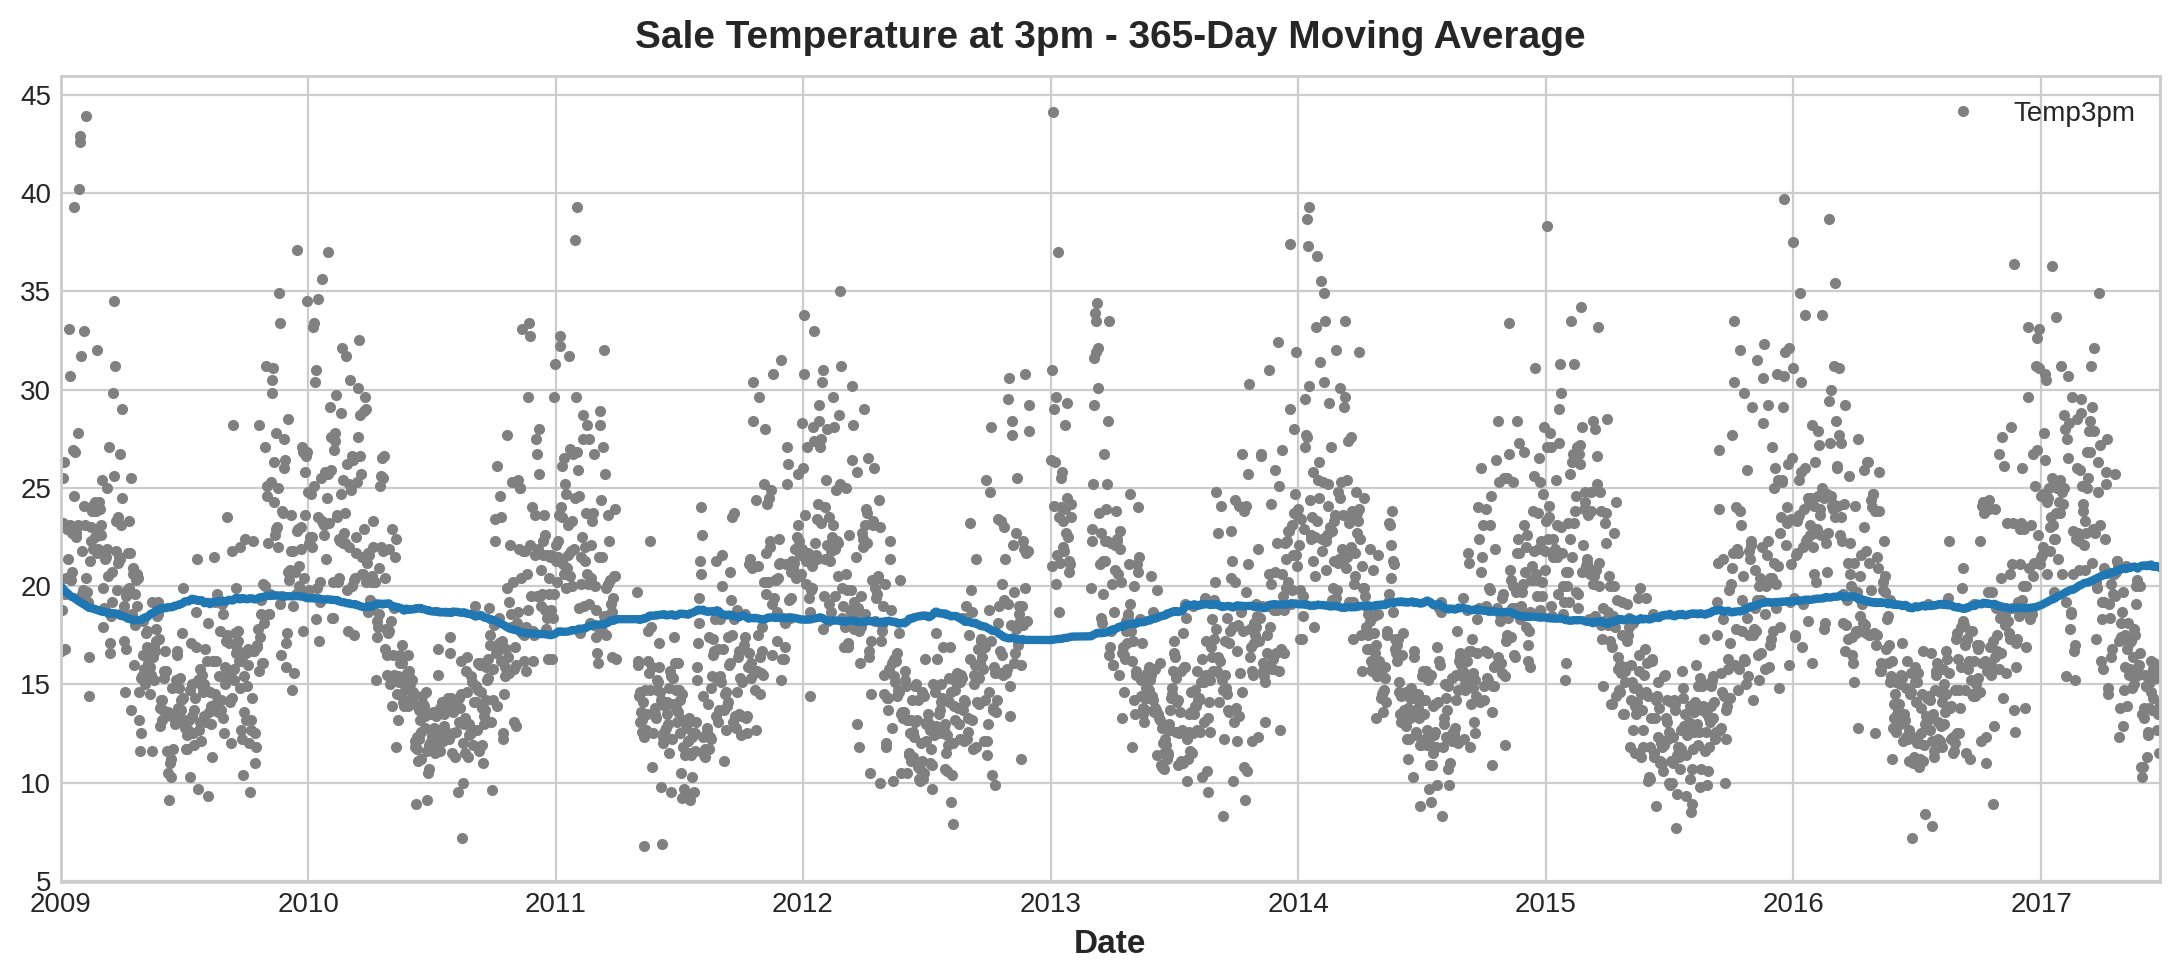

In [36]:
moving_average = data.rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = data.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Sale Temperature at 3pm - 365-Day Moving Average", legend=False,
);

In [37]:
dp = DeterministicProcess(
    index=data.index,
    constant=True,
    order=1,    # the time dummy (trend)
    drop=True   # drop terms if necessary to avoid collinear
)

# `in_sample` creates features for the dates given in the `index` argument
X = dp.in_sample()

X.head(5)

,const,trend
Date,,
2009-01-01,1.0,1.0
2009-01-02,1.0,2.0
2009-01-03,1.0,3.0
2009-01-04,1.0,4.0
2009-01-05,1.0,5.0


In [38]:
# Criando target e features

y = data['Temp3pm']  #target

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

In [39]:
y_pred.tail(5)

Date
2017-06-21    18.886373
2017-06-22    18.886442
2017-06-23    18.886511
2017-06-24    18.886581
2017-06-25    18.886650
Freq: D, dtype: float64

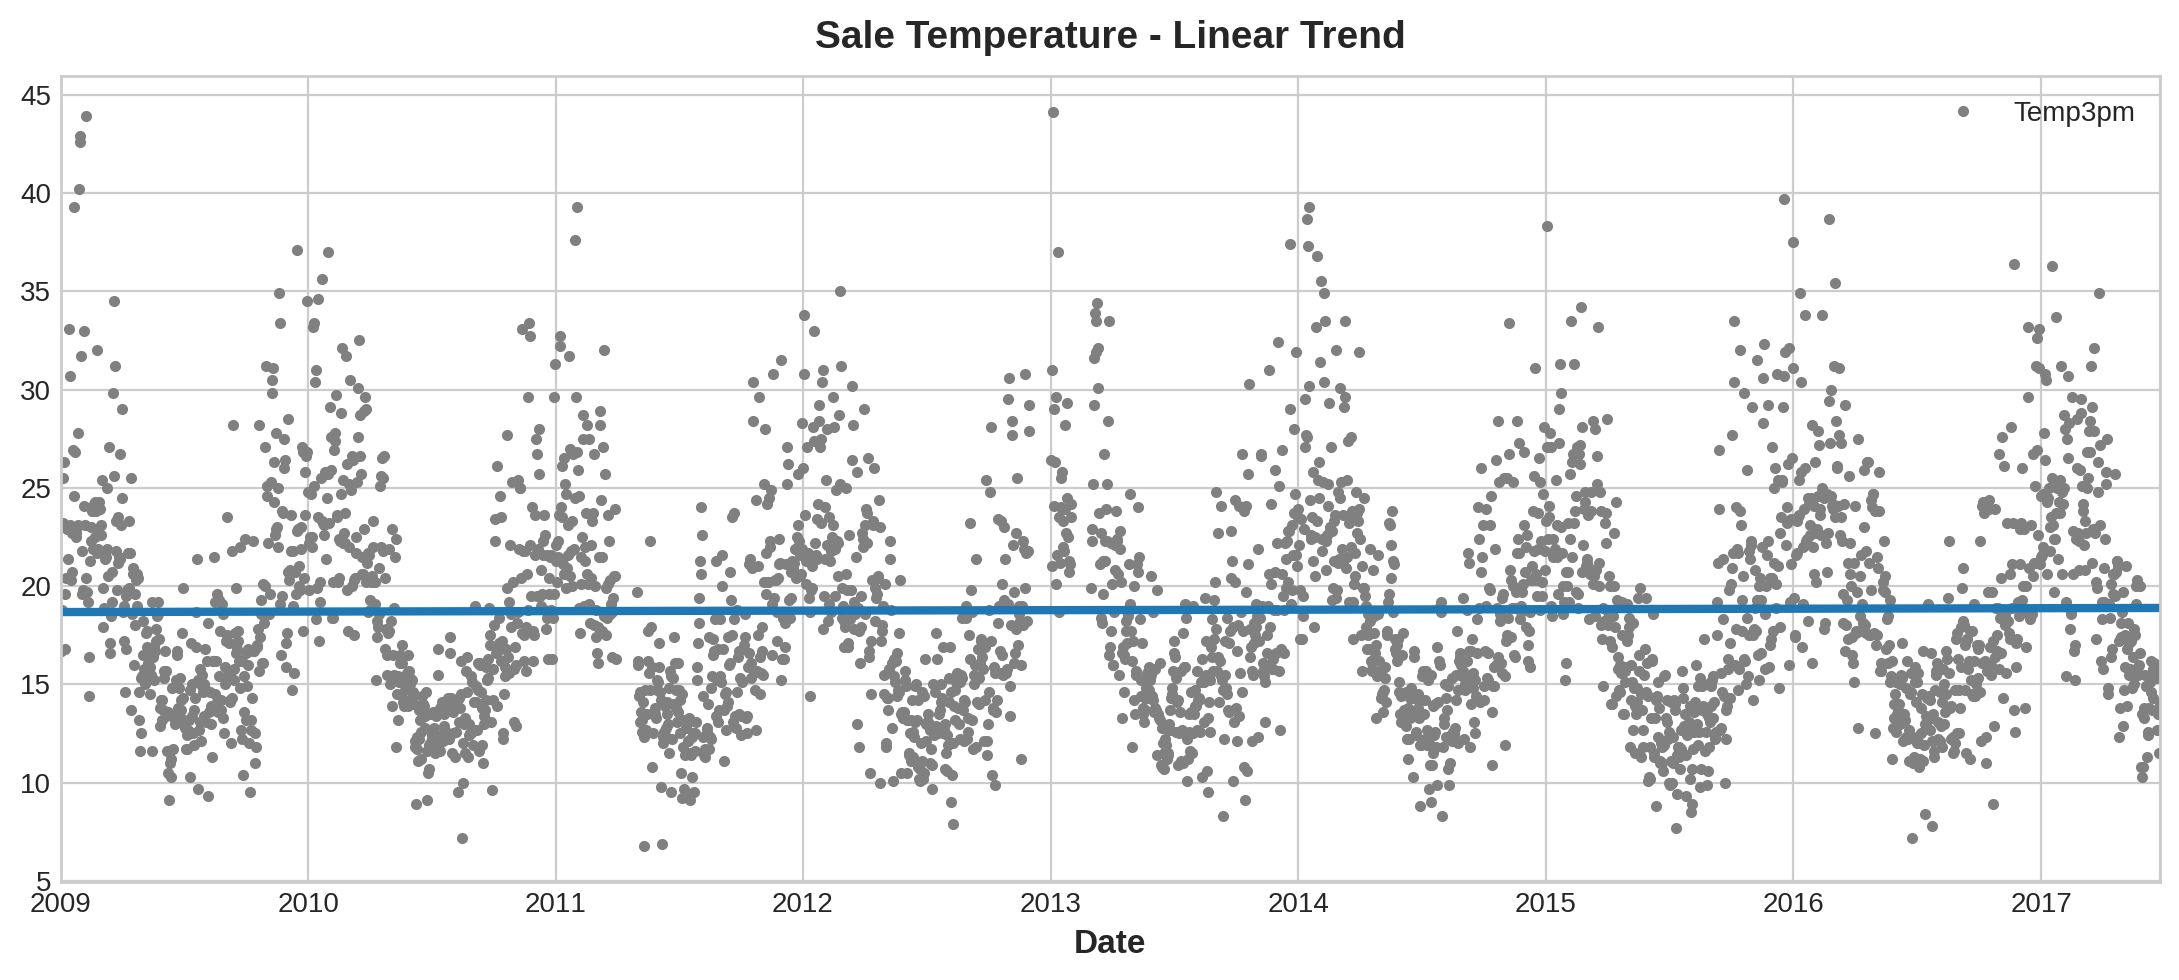

In [40]:
ax = data.plot(style=".", color="0.5", title="Sale Temperature - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [47]:
# Making the forecast

X_out = dp.out_of_sample(steps=30)

y_fore = pd.Series(model.predict(X_out), index=X_out.index)

y_fore.head()

2017-06-26    18.886719
2017-06-27    18.886788
2017-06-28    18.886857
2017-06-29    18.886926
2017-06-30    18.886996
Freq: D, dtype: float64

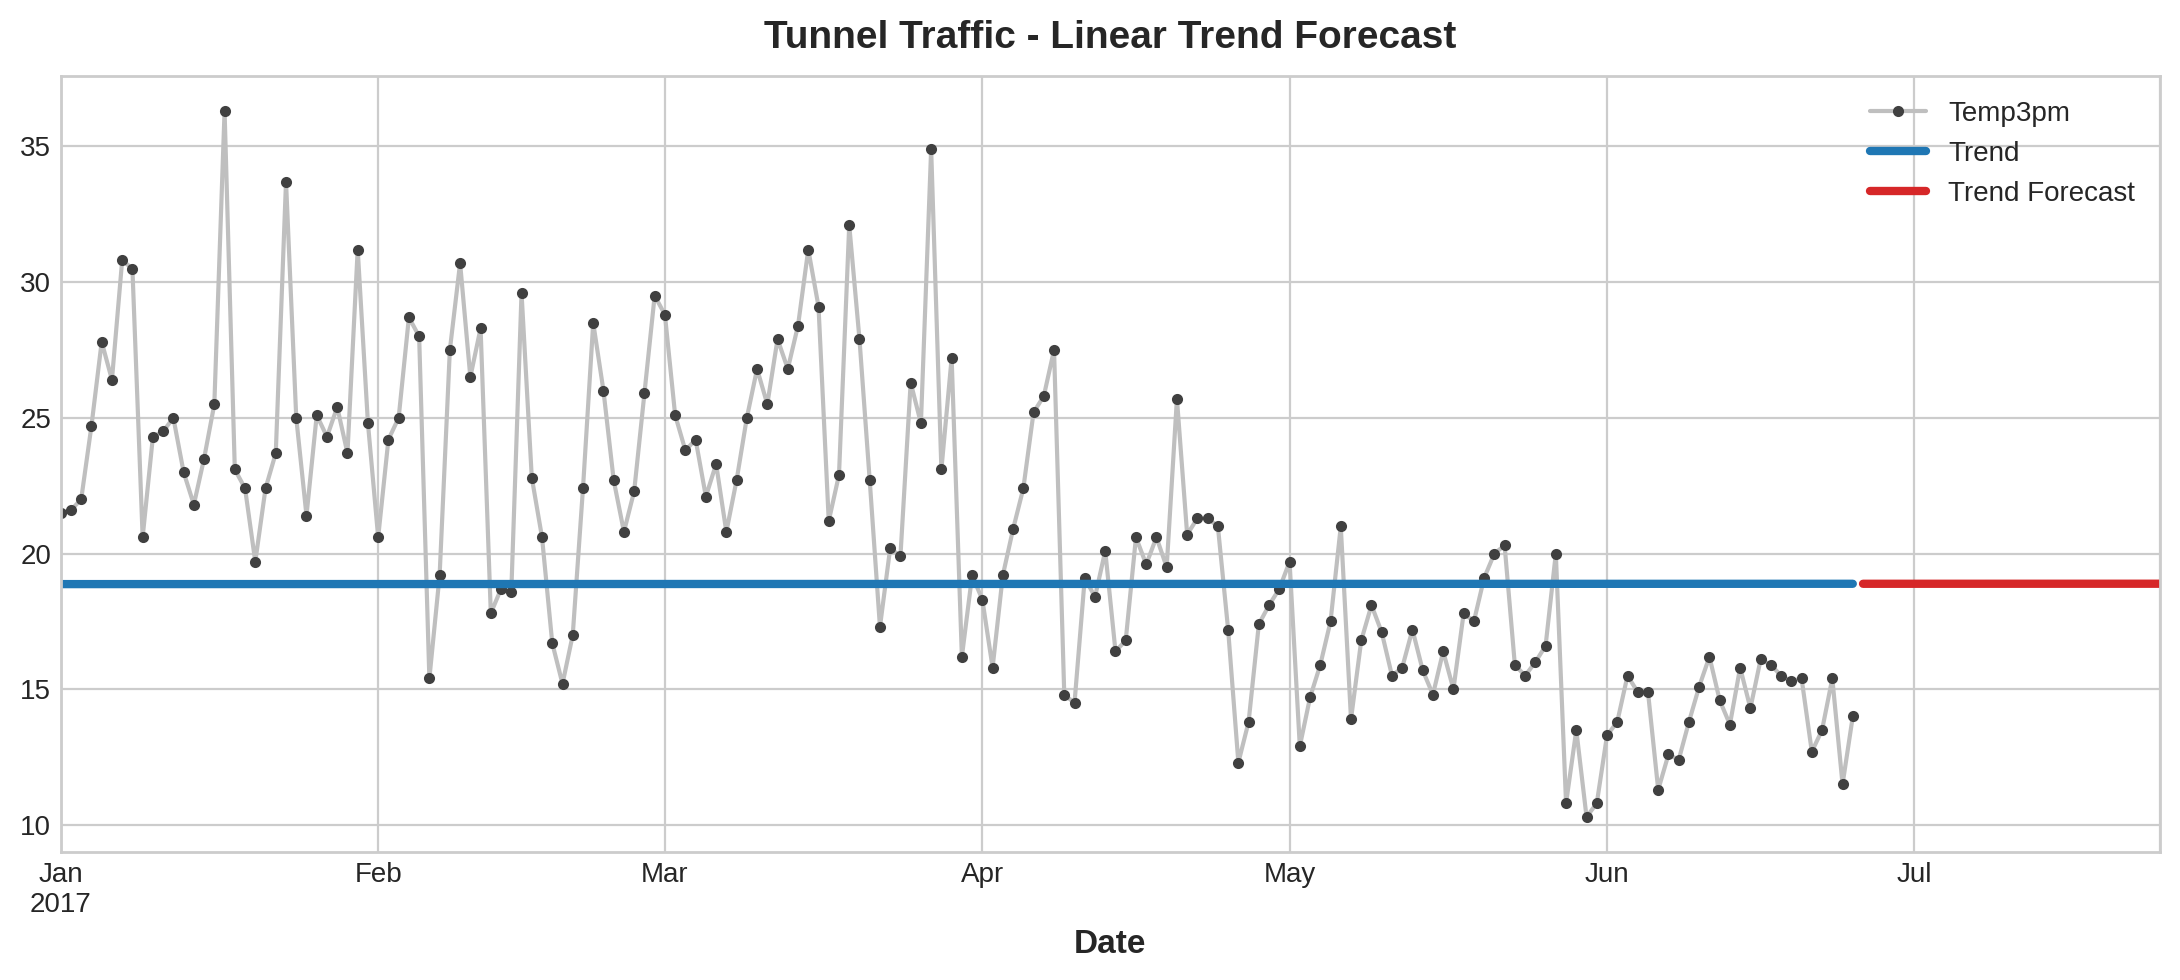

In [51]:
ax = data["2017-01":].plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)
ax = y_pred["2017-01":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()